Nivell 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seab
import mysql.connector
from mysql.connector import Error

conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='1234',
    database='sprint4',
    auth_plugin='mysql_native_password'
)

cursor = conn.cursor()

print("Conecció entre pupyter y mysql")

Conecció entre pupyter y mysql


- Exercici 1 - Una variable numèrica.

C:\Users\xXSrBiscuitXx\AppData\Local\Temp\ipykernel_17136\1807997908.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Aqui he representat la cuantitat de productes venuts, és útil per marketing. He escollit el gràfic de barres perque va bé visualment i es sencill d'entendre.
Mes o menys tots es venen.


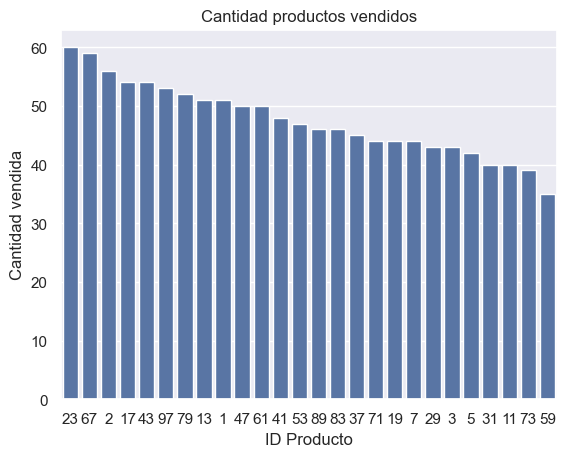

In [ ]:
query="""
SELECT * FROM transactions_products 
JOIN transaction on id = transaction_id 
WHERE declined=0
"""
seab.set_theme()
df = pd.read_sql(query, conn)
seab.countplot(data=df, x='product_id',order=df["product_id"].value_counts().index) 
plt.title("Cantidad productos vendidos")
plt.xlabel('ID Producto')
plt.ylabel("Cantidad vendida")

print("Aqui he representat la cuantitat de productes venuts, és útil per marketing. He escollit el gràfic de barres perque va bé visualment i es sencill d'entendre." \
"\nMes o menys tots es venen.")

- Exercici 2 - Dues variables numèriques.

C:\Users\xXSrBiscuitXx\AppData\Local\Temp\ipykernel_17480\2291393769.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Aquí, està la quantitat en dòlars per producte, aquest gràfic sería per complementar l'anterior. En aquest cas també s'utilitza el gràfic de barres per la seva interpretació sencilla.
Com alguns preus dels llibres son bastant dispars alguns llibres que es venen molt donen molts pocs ingresos, com per exemple el numero 2.
 Aquesta informació és útil per a marketing.


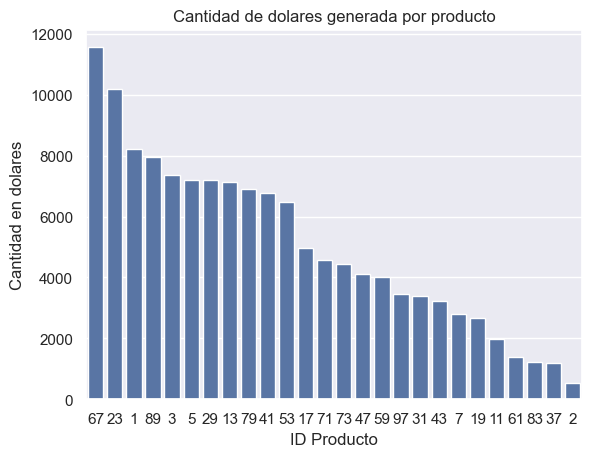

In [5]:
query="""
SELECT product_id, count(*) * CAST(REPLACE(price, '$', '') AS DECIMAL(10,2)) as suma
FROM transactions_products
JOIN transaction on id = transaction_id 
join products on product_id = products.id
WHERE declined=0
GROUP BY product_id
"""

seab.set_theme()
df = pd.read_sql(query, conn)
order = df.sort_values(by='suma', ascending=False)['product_id']
seab.barplot(data=df, x='product_id',y='suma',order=order) 

plt.title("Cantidad de dolares generada por producto")
plt.xlabel('ID Producto')
plt.ylabel("Cantidad en dolares")

print("Aquí, està la quantitat en dòlars per producte, aquest gràfic sería per complementar l'anterior. En aquest cas també s'utilitza el gràfic de barres per la seva interpretació sencilla." \
"\nCom alguns preus dels llibres son bastant dispars alguns llibres que es venen molt donen molts pocs ingresos, com per exemple el numero 2." \
"\n Aquesta informació és útil per a marketing.")

- Exercici 3 - Una variable categòrica.

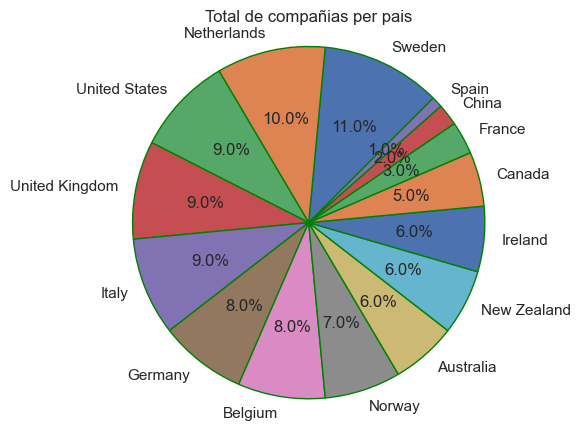

Amb el país de les companyies, he fet un conteig de quantes compnyies hi ha per país. En aquest cas el gràfic pie ilustra de forma correcta la distrubució del mercat. Es útil per marketing també.


In [ ]:
query = """
SELECT country , count(country) AS cantPais
FROM companies
GROUP BY country
"""

cursor.execute(query)
column_names = [desc[0] for desc in cursor.description]
rows = cursor.fetchall()
df = pd.DataFrame(rows, columns=column_names)
df_top = df.sort_values(by='cantPais', ascending=False)

plt.figure(figsize=(5,5))
plt.pie(
    df_top['cantPais'], 
    labels=df_top['country'].astype(str), 
    autopct='%1.1f%%', 
    startangle=45,
    wedgeprops={'edgecolor': 'green'}
)
plt.title('Total de compañias per pais')
plt.axis('equal')  # Para que el círculo quede perfecto
plt.show()

print("Amb el país de les companyies, he fet un conteig de quantes compnyies hi ha per país. En aquest cas el gràfic "'pie'" ilustra de forma correcta la distrubució del mercat. Es útil per marketing també.")

- Exercici 4 - Una variable categòrica i una numèrica.

C:\Users\xXSrBiscuitXx\AppData\Local\Temp\ipykernel_22676\215766944.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Aqui he calcular el total en dolars de cada empresa, es pot veure que el mercat està dominat per 7 empreses que aporten cuasi tot, totes les demés no superen els 1000 dolars.
He escollit aquest grafic y he simplificat el eix y perque la diferencia era massa gran. Es un boc grafic per veure els resultats.


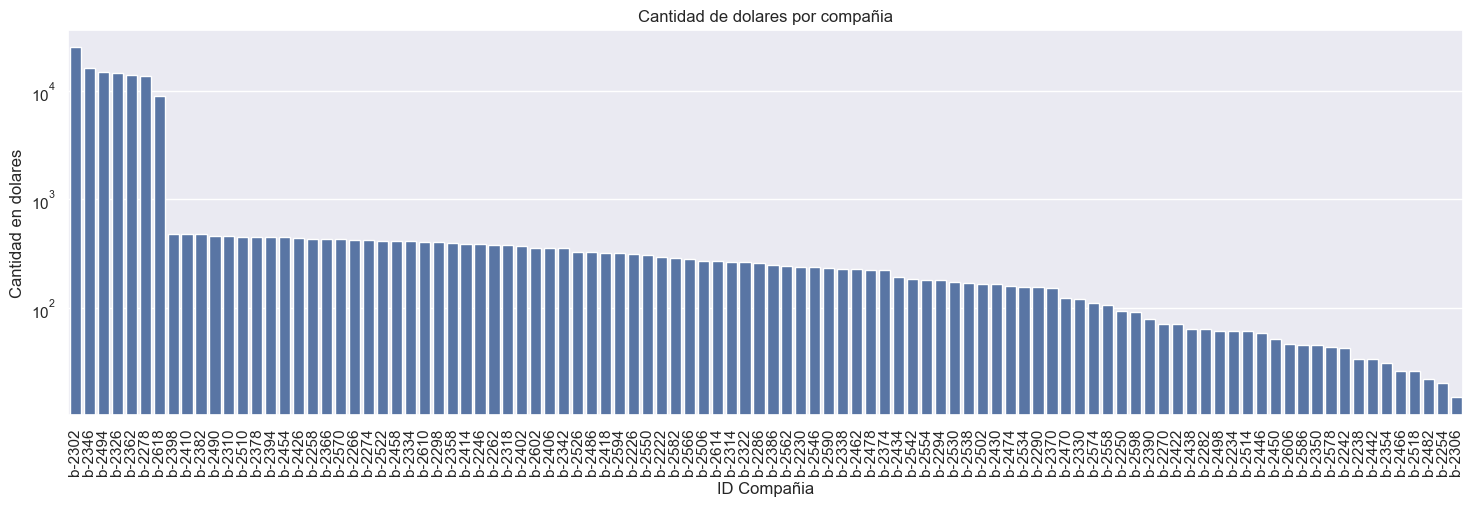

In [40]:
query="""
SELECT company_id, sum(amount) as suma
FROM companies
JOIN transaction on company_id = business_id 
WHERE declined=0
GROUP BY company_id
"""
plt.figure(figsize=(18,5))
seab.set_theme()
df = pd.read_sql(query, conn)
order = df.sort_values(by='suma', ascending=False)['company_id']
plt.yscale("log")
plt.xticks(rotation=90) 
seab.barplot(data=df, x='company_id',y='suma',order=order) 

plt.title("Cantidad de dolares por compañia")
plt.xlabel('ID Compañia')
plt.ylabel("Cantidad en dolares")

print("Aqui he calcular el total en dolars de cada empresa, es pot veure que el mercat està dominat per 7 empreses que aporten cuasi tot, totes les demés no superen els 1000 dolars." \
"\nHe escollit aquest grafic y he simplificat el eix y perque la diferencia era massa gran. Es un boc grafic per veure els resultats.")

- Exercici 5 - Dues variables categòriques.

C:\Users\xXSrBiscuitXx\AppData\Local\Temp\ipykernel_17480\274086976.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Amb aquest gràfic es pot apreciar cuants usuaris hi ha per pais y a quina compañia pertanyen. Es pot veure que en el regne unit hi han pocs i tenen 2 companyies, mentres que
en Canada está la majoría. Aquest gràfic ilustra molt be el que es vol saber. Serveix er coneixer el teu mercat.


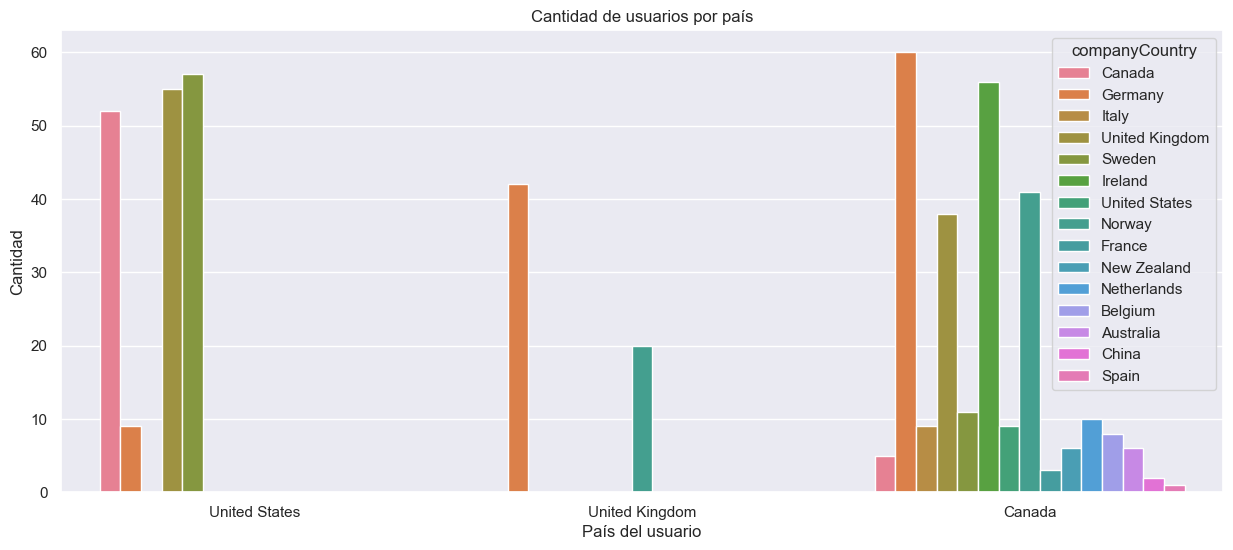

In [ ]:
query="""
SELECT users.country as userCountry, companies.country as companyCountry
FROM users
JOIN transaction on users.id=user_id
JOIN companies on company_id = business_id 
WHERE declined=0
"""
seab.set_theme()
df = pd.read_sql(query, conn)

plt.figure(figsize=(15, 6)) 
seab.countplot(data=df, x='userCountry', hue='companyCountry')

plt.title("Cantidad de usuarios por país")
plt.xlabel('País del usuario')
plt.ylabel("Cantidad")

print("Amb aquest gràfic es pot apreciar cuants usuaris hi ha per pais y a quina compañia pertanyen. Es pot veure que en el regne unit hi han pocs i tenen 2 companyies, mentres que" \
"\nen Canada está la majoría. Aquest gràfic ilustra molt be el que es vol saber. Serveix er coneixer el teu mercat.")

- Exercici 6 - Tres variables.

C:\Users\xXSrBiscuitXx\AppData\Local\Temp\ipykernel_22676\3571083695.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Aquest gràfic es una extensió del vist previament de la quantitat en dòlars per empresa, pero ara es veu també el país a la que pertanyen. Europa domina el mercat.
He escollit aquest gràfic perque representa de manera molt més clara el mercat actual.


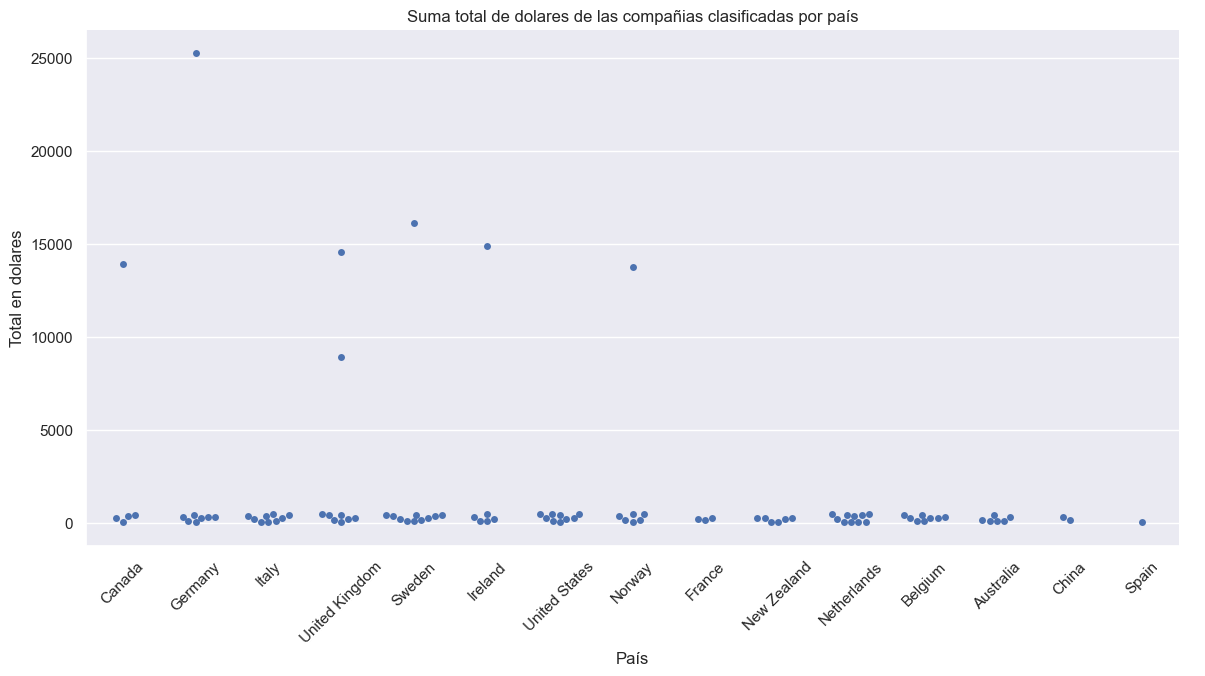

In [42]:
query="""
SELECT company_id, country, sum(amount) as suma
FROM companies
JOIN transaction on company_id = business_id 
WHERE declined=0
GROUP BY company_id, country
"""
seab.set_theme()
df = pd.read_sql(query, conn)

g=seab.catplot(data=df, x="country", y="suma", kind="swarm",height=6, aspect=2)
g.set_xticklabels(rotation=45)
plt.title('Suma total de dolares de las compañias clasificadas por país')
plt.ylabel("Total en dolares")
plt.xlabel("País")

print("Aquest gràfic es una extensió del vist previament de la quantitat en dòlars per empresa, pero ara es veu també el país a la que pertanyen. Europa domina el mercat." \
"\nHe escollit aquest gràfic perque representa de manera molt més clara el mercat actual.")

- Exercici 7 - Graficar un Pairplot.

C:\Users\xXSrBiscuitXx\AppData\Local\Temp\ipykernel_22676\720031919.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
c:\Users\xXSrBiscuitXx\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


          conteo     total
conteo  1.000000 -0.003064
total  -0.003064  1.000000
En aquest gràfic es busca una correlació en entre la quantitat de productes comprats i la quantitat de dòlars pagats. Crec que es interesant tenir en compte.
Com es pot veure, no hi ha cap tipus de relació entre la quantitat de productes i la quantitat de dòlars.


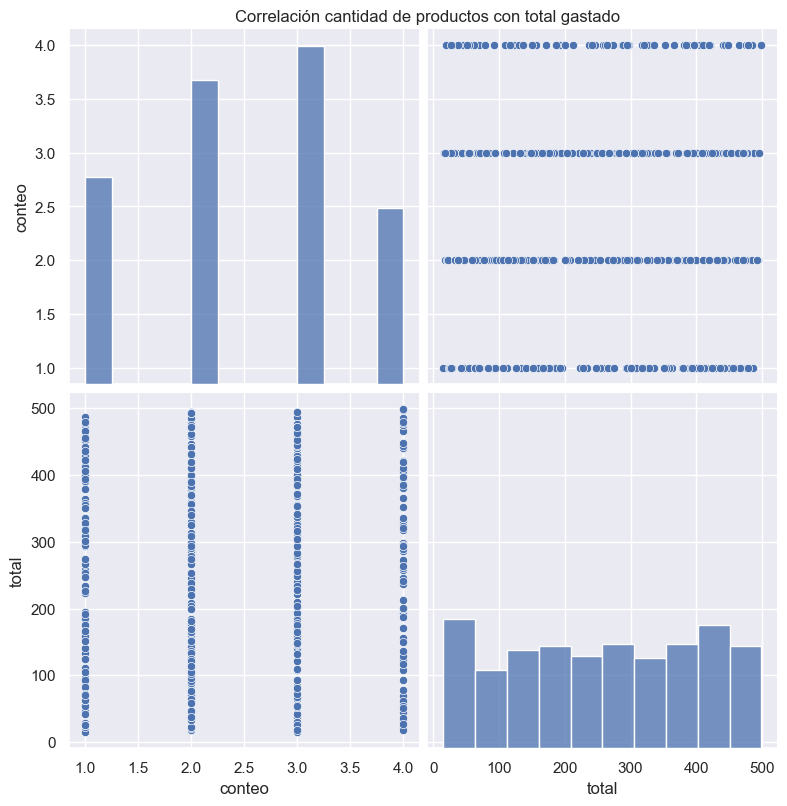

In [61]:
query="""
SELECT count(product_id) as conteo , amount as total, transaction_id
FROM transaction
JOIN transactions_products on transaction_id = transaction.id
JOIN products on products.id = product_id
JOIN companies on company_id=business_id
WHERE declined=0
group by transaction_id
"""
seab.set_theme()
df = pd.read_sql(query, conn)

g=seab.pairplot(df,size=4)
print(df.select_dtypes(include='number').corr())

plt.title('Correlación cantidad de productos con total gastado',loc='center',y=2.02,x=0)

print("En aquest gràfic es busca una correlació en entre la quantitat de productes comprats i la quantitat de dòlars pagats. Crec que es interesant tenir en compte." \
"\nCom es pot veure, no hi ha cap tipus de relació entre la quantitat de productes i la quantitat de dòlars.")

Nivell 2

- Exercici 1 - Correlació de totes les variables numèriques.

C:\Users\xXSrBiscuitXx\AppData\Local\Temp\ipykernel_13992\1343404885.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


                   cantidadProductos  averageWeigth    total$  averagePrice
cantidadProductos           1.000000      -0.035212 -0.003064     -0.036022
averageWeigth              -0.035212       1.000000 -0.041724      0.267538
total$                     -0.003064      -0.041724  1.000000      0.030898
averagePrice               -0.036022       0.267538  0.030898      1.000000
En la correlación de las 4 variables numericas se aprecia que no hay relación entre ellas. La única que tiene un poco de peso es la de total de dolares con cantidad
total de productos, pero esta es intuitiva y normal. Se ha escogido el pairplot porque es una buena forma de ver la relación con varias o más variables.
He agrupado por transacción porque aparte de que esto me permite ver la cantidad de productos, creo que separar por transacción da información más concisa.


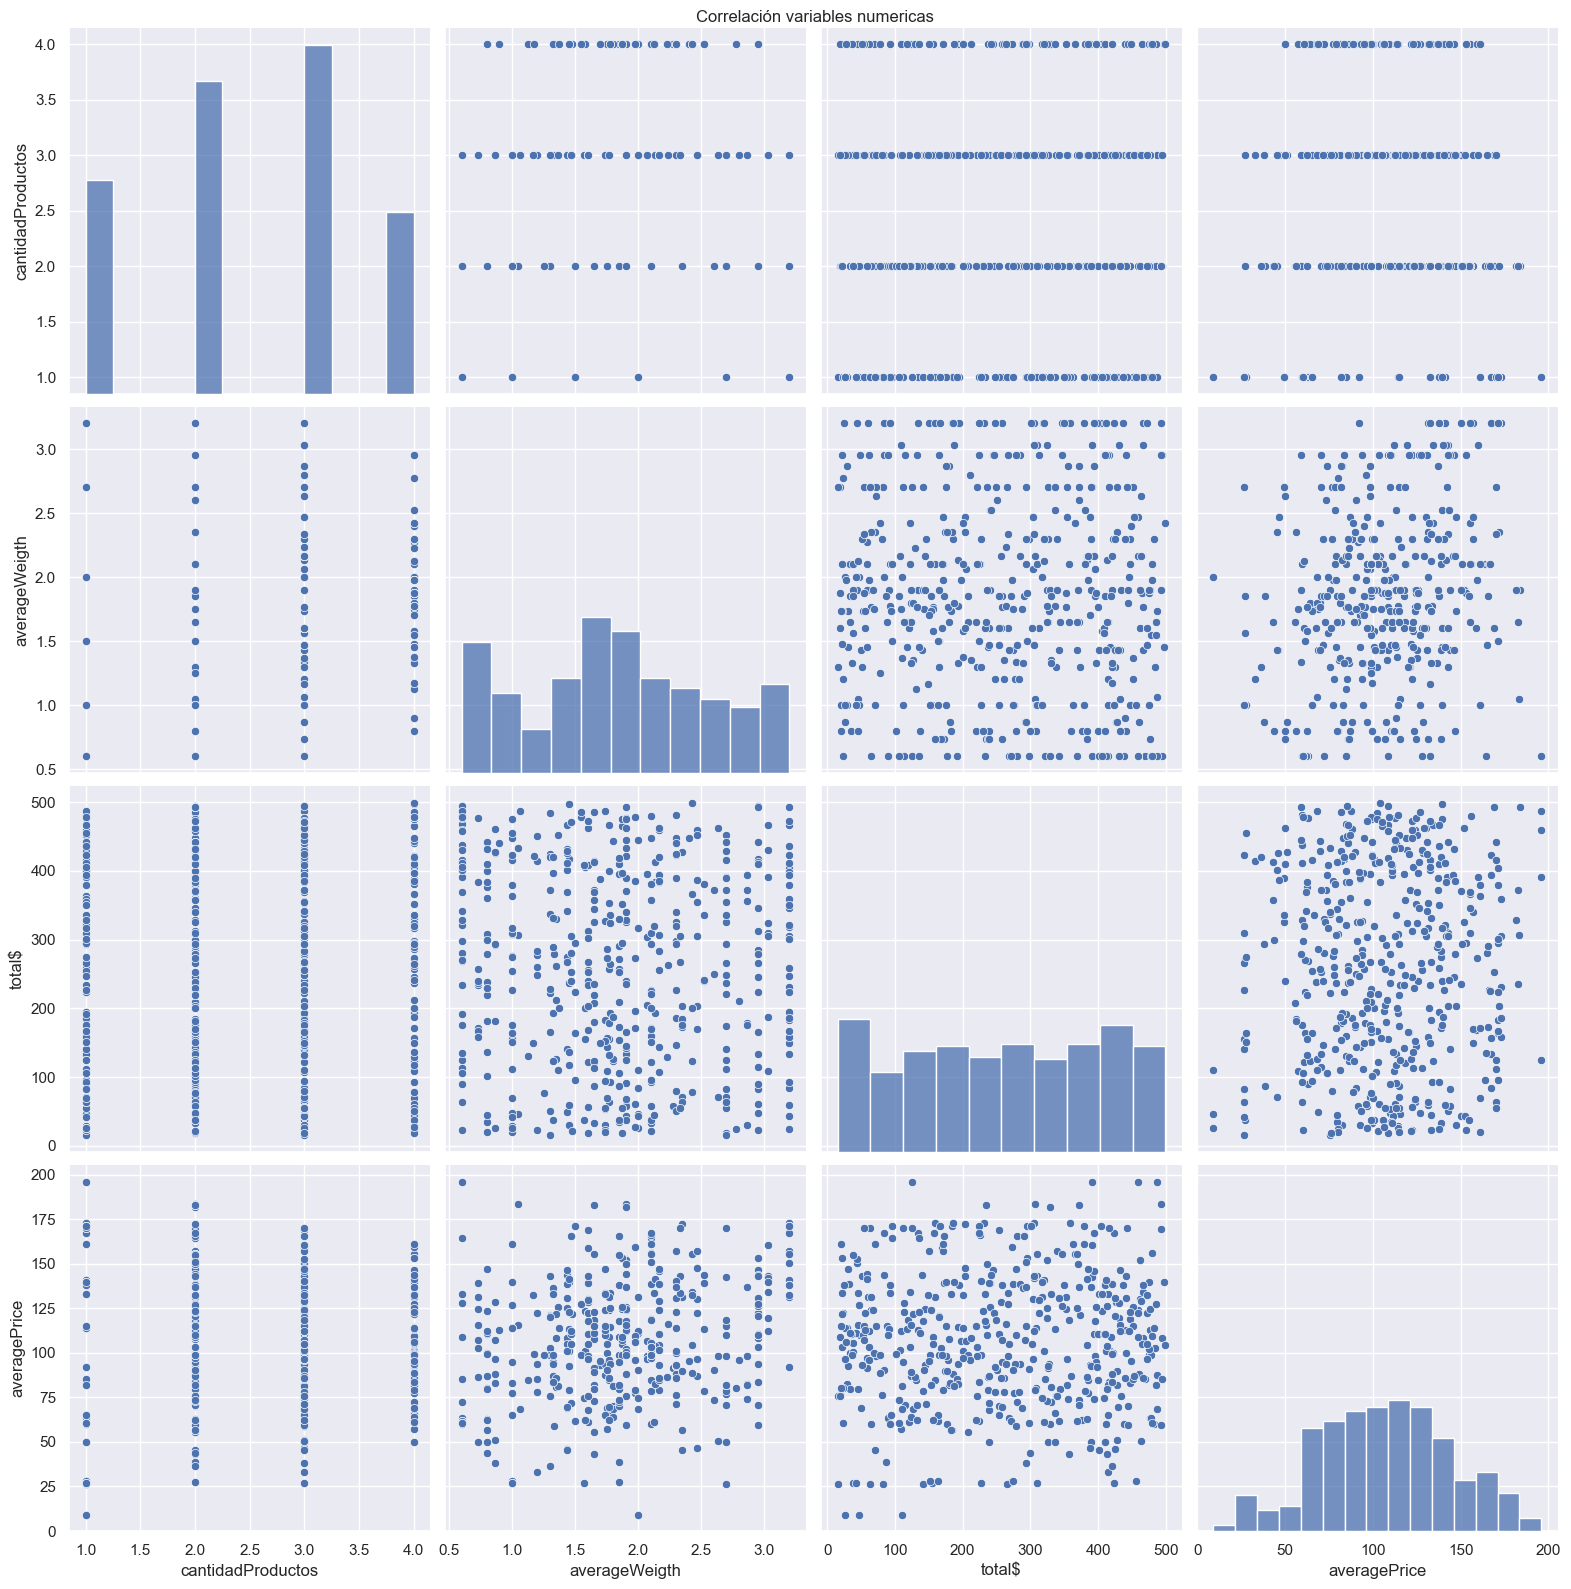

In [3]:
query="""
SELECT transaction_id, COUNT(product_id) as cantidadProductos, AVG(weight) as averageWeigth, max(amount) as total$, AVG(CAST(REPLACE(price, '$', '') AS DECIMAL(10,2))) AS averagePrice
FROM transaction
JOIN transactions_products ON transaction_id = transaction.id
JOIN products ON products.id = product_id
JOIN companies ON company_id = business_id
WHERE declined = 0
GROUP BY transaction_id
"""

seab.set_theme()
df = pd.read_sql(query, conn)
seab.pairplot(df, height=4)
print(df.select_dtypes(include='number').corr())

plt.title('Correlación variables numericas',loc='center',y=4.1,x=-1.06)

print("En la correlación de las 4 variables numericas se aprecia que no hay relación entre ellas. La única que tiene un poco de peso es la de total de dolares con cantidad" \
"\ntotal de productos, pero esta es intuitiva y normal. Se ha escogido el pairplot porque es una buena forma de ver la relación con varias o más variables." \
"\nHe agrupado por transacción porque aparte de que esto me permite ver la cantidad de productos, creo que separar por transacción da información más concisa.")

- Exercici 2 - Implementa un jointplot

C:\Users\xXSrBiscuitXx\AppData\Local\Temp\ipykernel_13992\2551032856.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


He escogido las variables de peso y dolares sin agrupaciones para ver si hay relación directa entre ellas, no parece ser. Los productos mas o menos generan la misma
cantidad independientemente del peso.


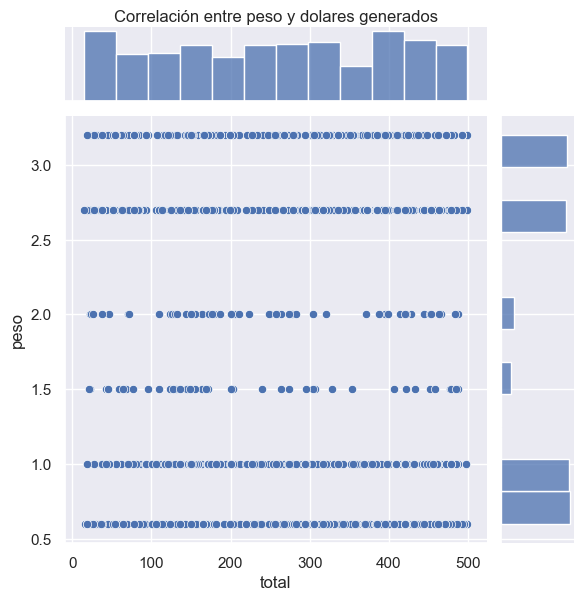

In [22]:
query="""
SELECT weight as peso, amount as total
FROM transaction
JOIN transactions_products ON transaction_id = transaction.id
JOIN products ON products.id = product_id
WHERE declined = 0
"""

seab.set_theme()
df = pd.read_sql(query, conn)

g=seab.jointplot(data=df, x="total", y='peso', kind='scatter')
plt.title('Correlación entre peso y dolares generados',loc='center',y=1.2)
print("He escogido las variables de peso y dolares sin agrupaciones para ver si hay relación directa entre ellas, no parece ser. Los productos mas o menos generan la misma" \
"\ncantidad independientemente del peso.")

Nivell 3

- Exercici 1 - Implementa un violinplot combinat amb un altre tipus de gràfic.

En este violinplot he querido ver la cantidad de dolares que gastan los usuarios separandolos por país, se puede ver que en canada y estados unidos donde existen más datos
estos tienen el punto más grueso en los 400, mientras que en el reino unido tiene el punto más grueso en los 250.
Los puntos negros marcan los puntos exactos de cada transacción


C:\Users\xXSrBiscuitXx\AppData\Local\Temp\ipykernel_22676\3054943126.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


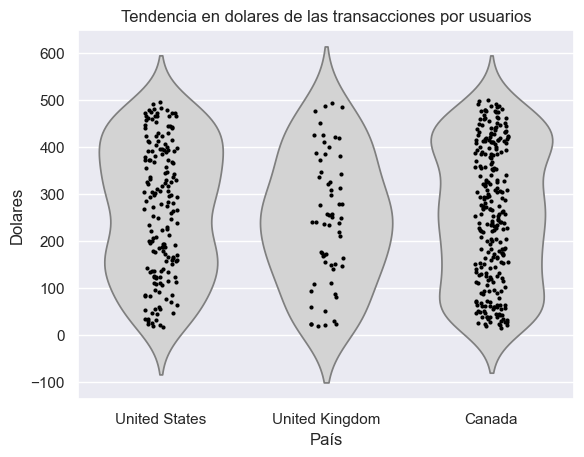

In [ ]:
query="""
SELECT users.country as country, amount
FROM transaction
JOIN users on users.id=user_id
join companies on company_id=business_id
WHERE declined = 0
"""

seab.set_theme()
df = pd.read_sql(query, conn)

seab.violinplot(data=df, x="country", y='amount', inner=None, color="lightgray")
seab.stripplot(data=df, x='country', y='amount', color='black', size=3, jitter=True)

plt.title('Tendencia en dolares de las transacciones por usuarios')
plt.ylabel("Dolares")
plt.xlabel("País")

print("En este violinplot he querido ver la cantidad de dolares que gastan los usuarios separandolos por país, se puede ver que en canada y estados unidos donde existen más datos" \
"\nestos tienen el punto más grueso en los 400, mientras que en el reino unido tiene el punto más grueso en los 250." \
"\nLos puntos negros marcan los puntos exactos de cada transacción")

- Exercici 2 - Genera un FacetGrid per a visualitzar múltiples aspectes de les dades simultàniament.

C:\Users\xXSrBiscuitXx\AppData\Local\Temp\ipykernel_22676\377193481.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Este facetgrid enseña la cantidad en dolares de cada usuario clasificandolo por en qué pais residen y el país de la compañía a la que han realizado la transacción.
Esto es útil para conocer más a fondo el mercado.


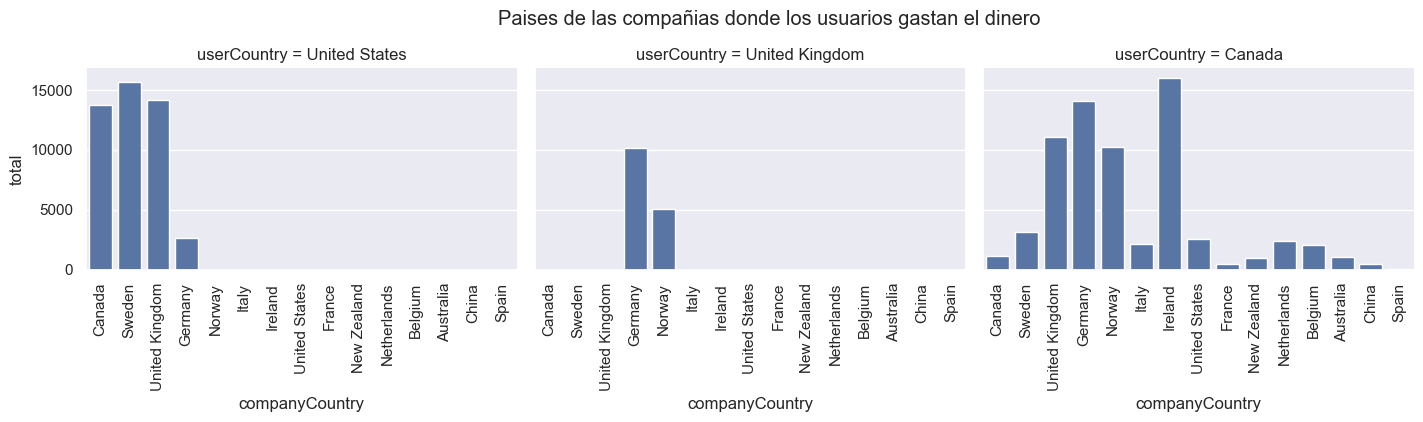

In [ ]:
query="""
SELECT users.country as userCountry, companies.country as companyCountry, sum(amount) as total
FROM transaction
JOIN users on users.id=user_id
join companies on company_id=business_id
WHERE declined = 0
group by userCountry,companyCountry
"""

seab.set_theme()
df = pd.read_sql(query, conn)
g = seab.FacetGrid(df, col='userCountry', height=4, aspect=1.2)
g.map_dataframe(seab.barplot, x='companyCountry', y="total")
g.set_xticklabels(rotation=90)
plt.tight_layout()
g.fig.suptitle('Paises de las compañias donde los usuarios gastan el dinero', y=1.05,x=0.54)

print("Este facetgrid enseña la cantidad en dolares de cada usuario clasificandolo por en qué pais residen y el país de la compañía a la que han realizado la transacción." \
"\nEsto es útil para conocer más a fondo el mercado.")